# Assignment - Basic Pandas
<sup>Created by Natawut Nupairoj, Department of Computer Engineering, Chulalongkorn University</sup>

Using pandas to explore youtube trending data from GB (GBvideos.csv and GB_category_id.json) and answer the questions.

In [2]:
import pandas as pd
import numpy as np

To simplify data retrieval process on Colab, we heck if we are in the Colab environment and download data files from a shared drive and save them in folder "data".

For those using jupyter notebook on the local computer, you can read data directly assuming you save data in the folder "data".

In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !wget https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/datasets/data.tgz -O data.tgz
    !tar -xzvf data.tgz

--2022-01-10 12:31:42--  https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/datasets/data.tgz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kaopanboonyuen/2110446_DataScience_2021s2/main/datasets/data.tgz [following]
--2022-01-10 12:31:42--  https://raw.githubusercontent.com/kaopanboonyuen/2110446_DataScience_2021s2/main/datasets/data.tgz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45477462 (43M) [application/octet-stream]
Saving to: ‘data.tgz’

data.tgz            100%[===================>]  43.37M   202MB/s    in 0.2s    

2022-01-10 12:31:43 (202 MB/s) - ‘data.tgz’ sa

## How many rows are there in the GBvideos.csv after removing duplications?

In [7]:
gb_vids = pd.read_csv('data/GBvideos.csv')
gb_vids.shape

(38916, 16)

In [8]:
gb_vids.drop_duplicates(inplace=True)
gb_vids.shape

(38745, 16)

## How many VDO's that contain at least one record (row) of "dislikes" more than "likes"?  <font color=red>DO NOT group by the data and make sure that you count only unique title!</font>

In [18]:
dislike_vids = gb_vids.where(gb_vids['dislikes'] > gb_vids['likes']).dropna()
# remove duplicate title
print(dislike_vids.shape)
dislike_vids = dislike_vids.drop_duplicates(subset='title')
print(dislike_vids.shape)
dislike_vids.head()

(481, 16)
(52, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
110,l9nGCJlDclQ,17.14.11,After Show: Did Kate Hudson Date Brad Pitt? | ...,Watch What Happens Live with Andy Cohen,24.0,2017-11-08T17:00:01.000Z,"What What Happens live|""reality""|""interview""|""...",53253.0,184.0,187.0,83.0,https://i.ytimg.com/vi/l9nGCJlDclQ/default.jpg,False,False,False,"During the After Show, Andy Cohen asks actress..."
161,S0A4hBJHND4,17.14.11,Svjetska ekskluziva: Provala u stan Dejana Lov...,Jutarnji list,24.0,2017-11-03T12:30:24.000Z,[none],83794.0,83.0,108.0,74.0,https://i.ytimg.com/vi/S0A4hBJHND4/default.jpg,False,False,False,Lopovi batovima demolirali vrata hrvatskom rep...
2406,qu-biRtYEcU,17.26.11,Volar - Jaime Ciero,paulitaale,10.0,2011-12-26T02:50:18.000Z,"Jaime Ciero|""compositor""|""cantautor Chileno Me...",1213682.0,757.0,3275.0,1495.0,https://i.ytimg.com/vi/qu-biRtYEcU/default.jpg,False,False,False,"Jaime Ciero, compositor, cantautor Chileno Me ..."
3511,S91qCkeiu3U,17.01.12,Paige VanZant Confirms Jan. 14 fight in St. Lo...,MMAFightingonSBN,17.0,2017-11-28T05:12:54.000Z,"mmafighting.com|""mma""|""fighting""|""mmafightingo...",6097.0,64.0,135.0,97.0,https://i.ytimg.com/vi/S91qCkeiu3U/default.jpg,False,False,False,Paige VanZant speaks to Ariel Helwani on The M...
4196,Vlv_rWiwp-0,17.05.12,DAY 4: Kendall Jenner by Phil Poynter #LOVEADV...,LOVE TV by LOVE Magazine,22.0,2017-12-04T08:23:17.000Z,"kendall jenner|""kendall""|""loveadvent2017""|""lov...",108094.0,306.0,604.0,179.0,https://i.ytimg.com/vi/Vlv_rWiwp-0/default.jpg,False,False,False,Inspired by the Basic Instinct video from Love...


## How many VDO that are trending on 22 Jan 2018 with comments more than 10,000 comments?

In [21]:
# gb_vids.trending_date
gb_vids['trending_date']

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
38911    18.14.06
38912    18.14.06
38913    18.14.06
38914    18.14.06
38915    18.14.06
Name: trending_date, Length: 38745, dtype: object

In [22]:
from datetime import datetime, timezone

In [37]:
gb_vids['trending_dt'] = pd.to_datetime(gb_vids['trending_date'], format='%y.%d.%m')
jan2018 = datetime(2018, 1, 22, tzinfo=timezone.utc)
trending_vids = gb_vids[(gb_vids['trending_date'] == '18.22.01') & (gb_vids['comment_count'] > 10000)].dropna()
trending_vids.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_dt
13392,WAwRrtH-4Lg,18.22.01,My Horibal Speling,TheOdd1sOut,23,2018-01-20T17:15:48.000Z,"spelling|""school""|""teacher""|""speech""|""audioboo...",5686453,334806,3787,70565,https://i.ytimg.com/vi/WAwRrtH-4Lg/default.jpg,False,False,False,hOI guis!!1! Thx 4 wathcing my vid abuot my ho...,2018-01-22
13394,Y-iFgDK_D5s,18.22.01,The Smallest Bird you have ever seen,A Chick Called Albert,15,2018-01-21T00:10:07.000Z,"wren|""baby bird""|""incubating""|""nest""|""birdnest...",1481728,64757,1015,10121,https://i.ytimg.com/vi/Y-iFgDK_D5s/default.jpg,False,False,False,By accident I got hold of two of the smallest ...,2018-01-22
13397,lrWRy9BBp-c,18.22.01,ELDERS REACT TO UGANDAN KNUCKLES MEMES,FBE,24,2018-01-19T22:00:02.000Z,"ugandan knuckles memes|""ugandan knuckles""|""uga...",1874710,54224,4897,14099,https://i.ytimg.com/vi/lrWRy9BBp-c/default.jpg,False,False,False,Ugandan Knuckles Memes reacted to by Elders! O...,2018-01-22
13398,_7985zBEM3o,18.22.01,Primitive Technology: A-frame hut,Primitive Technology,22,2018-01-19T21:09:10.000Z,[none],3702942,161760,1414,13839,https://i.ytimg.com/vi/_7985zBEM3o/default.jpg,False,False,False,I built an A frame hut as a large work space f...,2018-01-22
13411,liczsmUSMA4,18.22.01,"J. Balvin, Jeon, Anitta - Machika",jbalvinVEVO,10,2018-01-19T05:00:01.000Z,"J Balvin|""Official Video""|""Machika""|""Anitta""|""...",24103517,777582,63601,69932,https://i.ytimg.com/vi/liczsmUSMA4/default.jpg,False,False,False,"J BALVIN, ANITTA, JEON “MACHIKA” \nhttps://UML...",2018-01-22


## Which date that has the minimum average number of comments per VDO?

<Axes: xlabel='trending_date'>

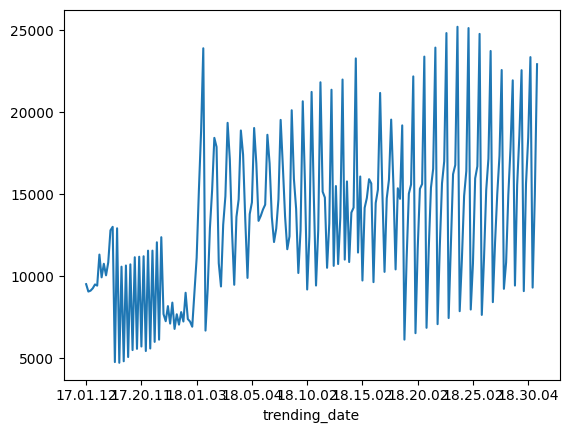

In [43]:
vids_by_date = gb_vids.groupby('trending_date')

vids_by_date.comment_count.mean().plot()

In [45]:
vids_by_date.comment_count.mean().sort_values()

trending_date
17.15.11     4738.673367
17.14.11     4781.875000
17.16.11     4830.542714
17.17.11     5089.375000
17.21.11     5455.350000
                ...     
18.21.05    23940.831169
18.25.05    24776.149068
18.22.05    24825.881579
18.24.05    25130.870968
18.23.05    25209.261438
Name: comment_count, Length: 205, dtype: float64

## Compare "Sports" and "Comady", how many days that there are more total daily views of VDO in "Sports" category than in "Comady" category?

In [46]:
import json

In [47]:
with open('data/GB_category_id.json') as fd:
    cat = json.load(fd)

In [48]:
cat_list = []
for d in cat['items']:
    cat_list.append((int(d['id']), d['snippet']['title']))
print(cat_list)

[(1, 'Film & Animation'), (2, 'Autos & Vehicles'), (10, 'Music'), (15, 'Pets & Animals'), (17, 'Sports'), (18, 'Short Movies'), (19, 'Travel & Events'), (20, 'Gaming'), (21, 'Videoblogging'), (22, 'People & Blogs'), (23, 'Comedy'), (24, 'Entertainment'), (25, 'News & Politics'), (26, 'Howto & Style'), (27, 'Education'), (28, 'Science & Technology'), (30, 'Movies'), (31, 'Anime/Animation'), (32, 'Action/Adventure'), (33, 'Classics'), (34, 'Comedy'), (35, 'Documentary'), (36, 'Drama'), (37, 'Family'), (38, 'Foreign'), (39, 'Horror'), (40, 'Sci-Fi/Fantasy'), (41, 'Thriller'), (42, 'Shorts'), (43, 'Shows'), (44, 'Trailers')]


In [50]:
cat_df = pd.DataFrame(cat_list, columns=['id', 'category'])
cat_df

,id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [52]:
vdo_df_withcat = gb_vids.merge(cat_df, left_on='category_id', right_on='id')
vdo_df_withcat.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_dt,id,category
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,2017-11-14,26,Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,2017-11-14,24,Entertainment
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,2017-11-14,10,Music
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,2017-11-14,17,Sports
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,2017-11-14,25,News & Politics


In [55]:
vdo_df_withcat['category'] == 'Sports'

0        False
1        False
2        False
3         True
4        False
         ...  
38650    False
38651    False
38652    False
38653    False
38654    False
Name: category, Length: 38655, dtype: bool

In [59]:
date_map = {}
for row in vdo_df_withcat.itertuples():
    date = row.trending_date
    if row.category == 'Sports':
        current = date_map.get(date, (0,0))
        date_map[date] = (current[0] + row.views, current[1])
    elif row.category == 'Comedy':
        current = date_map.get(date, (0,0))
        date_map[date] = (current[0], row.views + current[1])
# print(date_map)
cou=0
for k, v in date_map.items():
    sports_views, comedy_views = v
    if sports_views > comedy_views:
        cou += 1
print(cou)

49


In [63]:
# Step 1: Filter for relevant categories
filtered_df = vdo_df_withcat[vdo_df_withcat['category'].isin(['Sports', 'Comedy'])]
filtered_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_dt,id,category
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,2017-11-14,17,Sports
10,ONQ-fAp5X64,17.14.11,CAN BABIES DO GYMNASTICS? **World Record**,Nile Wilson,17,2017-11-11T10:30:00.000Z,"nile wilson|""nile wilson gymnastics""|""nile wil...",306724,9591,266,448,https://i.ytimg.com/vi/ONQ-fAp5X64/default.jpg,False,False,False,➢ Join my FREE 7 Steps to Success - http://www...,2017-11-14,17,Sports
18,jp9hK-jY6yY,17.14.11,When Someone Has A Crush on You | Lilly Singh,IISuperwomanII,23,2017-11-09T22:21:13.000Z,"iisuperwomanii|""iisuperwomenii""|""superwoman""|""...",3371669,202676,3394,20086,https://i.ytimg.com/vi/jp9hK-jY6yY/default.jpg,False,False,False,You know that feeling when someone has a crush...,2017-11-14,23,Comedy
26,_6ViZ13mN9I,17.14.11,GSP and Tyron Woodley Talk About Their Potenti...,TMZSports,17,2017-11-10T21:52:31.000Z,"TMZ|""TMZ Sports""|""TMZ Sports Channel""|""TMZ 201...",86296,629,77,642,https://i.ytimg.com/vi/_6ViZ13mN9I/default.jpg,False,False,False,Every Friday on TMZ Sports UFC Welterweight Ch...,2017-11-14,17,Sports
28,g5c1bk8weaQ,17.14.11,FIRST TIME IM DOING THIS! TALKS WITH LIZA.,Liza Koshy,23,2017-11-10T03:43:43.000Z,"liza|""lizza""|""lizzza""|""lizzzavine""|""lizzzak""|""...",3578502,307435,2573,12248,https://i.ytimg.com/vi/g5c1bk8weaQ/default.jpg,False,False,False,"Having kids, having anxiety and not having boo...",2017-11-14,23,Comedy


In [64]:
# Step 2: Group by `trending_date` and `category`, summing up the views
grouped = filtered_df.groupby(['trending_date', 'category'])['views'].sum().reset_index()
grouped.head()

,trending_date,category,views
0,17.01.12,Comedy,10889970
1,17.01.12,Sports,9879808
2,17.02.12,Comedy,13302391
3,17.02.12,Sports,10856461
4,17.03.12,Comedy,14259944


In [65]:
# Step 3: Pivot the data to create separate columns for `Sports` and `Comedy`
pivoted = grouped.pivot(index='trending_date', columns='category', values='views').fillna(0)
pivoted.head()

category,Comedy,Sports
trending_date,,
17.01.12,10889970,9879808
17.02.12,13302391,10856461
17.03.12,14259944,10875249
17.04.12,16617431,11399173
17.05.12,19089597,11261410


In [66]:
# Step 4: Compare views for Sports and Comedy
# Add a column to check if Sports views are greater than Comedy views
pivoted['sports_greater'] = pivoted['Sports'] > pivoted['Comedy']
pivoted.head()

category,Comedy,Sports,sports_greater
trending_date,,,
17.01.12,10889970,9879808,False
17.02.12,13302391,10856461,False
17.03.12,14259944,10875249,False
17.04.12,16617431,11399173,False
17.05.12,19089597,11261410,False


In [67]:
# Step 5: Count the number of dates where Sports views > Comedy views
count = pivoted['sports_greater'].sum()

print(count)


49


In [56]:
# # group by category and trending date
# vdo_cat_date = vdo_df_withcat.groupby(['category', 'trending_date'])
# vdo_cat_date.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_dt,id,category
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,2017-11-14,26,Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,2017-11-14,24,Entertainment
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,2017-11-14,10,Music
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,2017-11-14,17,Sports
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,2017-11-14,25,News & Politics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38605,JtIY1Naxg0M,18.14.06,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1709880,44588,360,4335,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...,2018-06-14,43,Shows
38613,8nWw8q3zEpw,18.14.06,GIANT 15 POUND LOBSTER MUKBANG! 먹방 (EATING SHOW!),Kim Thai,22,2018-05-20T22:42:02.000Z,"kim thai|""mukbang""|""seafood boil""|""15 pound lo...",369844,8343,749,1857,https://i.ytimg.com/vi/8nWw8q3zEpw/default.jpg,False,False,False,WHERE I BOUGHT THIS 15 POUND LOBSTER: https://...,2018-06-14,22,People & Blogs
38614,GxYimeaoea0,18.14.06,"Political Correctness Debate ft. Stephen Fry, ...",Truthspeak,22,2018-05-19T04:05:06.000Z,"Munk Debate|""Jordan Peterson""|""Stephen Fry""|""M...",2228345,32140,1729,38126,https://i.ytimg.com/vi/GxYimeaoea0/default.jpg,False,False,False,Canadian psychologist Jordan Peterson and Brit...,2018-06-14,22,People & Blogs
38616,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,2018-06-14,15,Pets & Animals


In [ ]:
vdo_cat_date.where((vdo_df_withcat['category'] == 'Sports')['views'] > 10)

KeyError: 'views'